In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing Dataset of Sales

file_name = 'asv.csv'
data = pd.read_csv(file_name)

In [4]:
# To get the information about dataset:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          5000 non-null   object 
 1   Country         5000 non-null   object 
 2   Item Type       5000 non-null   object 
 3   Sales Channel   5000 non-null   object 
 4   Order Priority  5000 non-null   object 
 5   Order Date      5000 non-null   object 
 6   Order ID        5000 non-null   int64  
 7   Ship Date       5000 non-null   object 
 8   Units Sold      5000 non-null   int64  
 9   Unit Price      5000 non-null   float64
 10  Unit Cost       5000 non-null   float64
 11  Total Revenue   5000 non-null   float64
 12  Total Cost      5000 non-null   float64
 13  Total Profit    5000 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 547.0+ KB


In [5]:
# To print the Dataset:

data.head(20)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Central America and the Caribbean,Antigua and Barbuda,Baby Food,Online,M,12/20/2013,957081544,1/11/2014,552,255.28,159.42,140914.56,87999.84,52914.72
1,Central America and the Caribbean,Panama,Snacks,Offline,C,7/5/2010,301644504,7/26/2010,2167,152.58,97.44,330640.86,211152.48,119488.38
2,Europe,Czech Republic,Beverages,Offline,C,9/12/2011,478051030,9/29/2011,4778,47.45,31.79,226716.10,151892.62,74823.48
3,Asia,North Korea,Cereal,Offline,L,5/13/2010,892599952,6/15/2010,9016,205.70,117.11,1854591.20,1055863.76,798727.44
4,Asia,Sri Lanka,Snacks,Offline,C,7/20/2015,571902596,7/27/2015,7542,152.58,97.44,1150758.36,734892.48,415865.88
5,Middle East and North Africa,Morocco,Personal Care,Offline,L,11/8/2010,412882792,11/22/2010,48,81.73,56.67,3923.04,2720.16,1202.88
6,Australia and Oceania,Federated States of Micronesia,Clothes,Offline,H,3/28/2011,932776868,5/10/2011,8258,109.28,35.84,902434.24,295966.72,606467.52
7,Europe,Bosnia and Herzegovina,Clothes,Online,M,10/14/2013,919133651,11/4/2013,927,109.28,35.84,101302.56,33223.68,68078.88
8,Middle East and North Africa,Afghanistan,Clothes,Offline,M,8/27/2016,579814469,10/5/2016,8841,109.28,35.84,966144.48,316861.44,649283.04
9,Sub-Saharan Africa,Ethiopia,Baby Food,Online,M,4/13/2015,192993152,5/7/2015,9817,255.28,159.42,2506083.76,1565026.14,941057.62


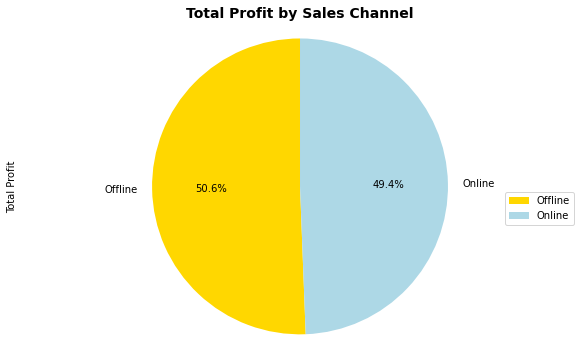

In [12]:
# To visualize the Totol profit based on different Sales Channels:

plt.figure(figsize=(10, 6))

sales_channel_profit = data.groupby('Sales Channel')['Total Profit'].sum()
sales_channel_profit.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['gold', 'lightblue', 'lightgreen', 'lightcoral'])

plt.title('Total Profit by Sales Channel', fontsize=14, weight='bold')

plt.axis('equal')  

plt.legend(loc='best', bbox_to_anchor=(1, 0.5))  

plt.show()

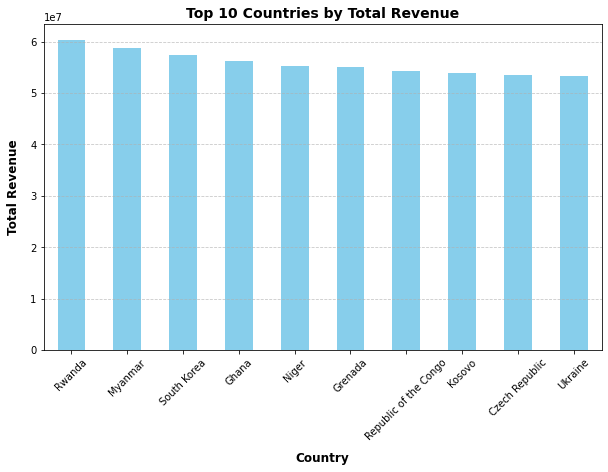

In [11]:
# To visulaize the top ten countries that generated the most revenue:

top_countries = data.groupby('Country')['Total Revenue'].sum().nlargest(10)
top_countries.plot(kind='bar', figsize=(10, 6), color='skyblue')

plt.xlabel('Country', fontsize=12, labelpad=10, weight='bold')
plt.ylabel('Total Revenue', fontsize=12, labelpad=10, weight='bold')

plt.title('Top 10 Countries by Total Revenue', fontsize=14, weight='bold')

plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

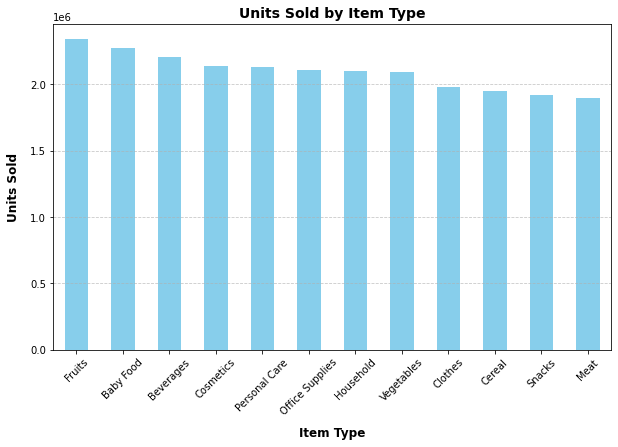

In [10]:
# To vizualise the total units sold based on item type:

sorted_data = data.groupby('Item Type')['Units Sold'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))

sorted_data.plot(kind='bar', color='skyblue')

plt.xlabel('Item Type', fontsize=12, labelpad=10, weight='bold')
plt.ylabel('Units Sold', fontsize=12, labelpad=10, weight='bold')

plt.title('Units Sold by Item Type', fontsize=14, weight='bold')

plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

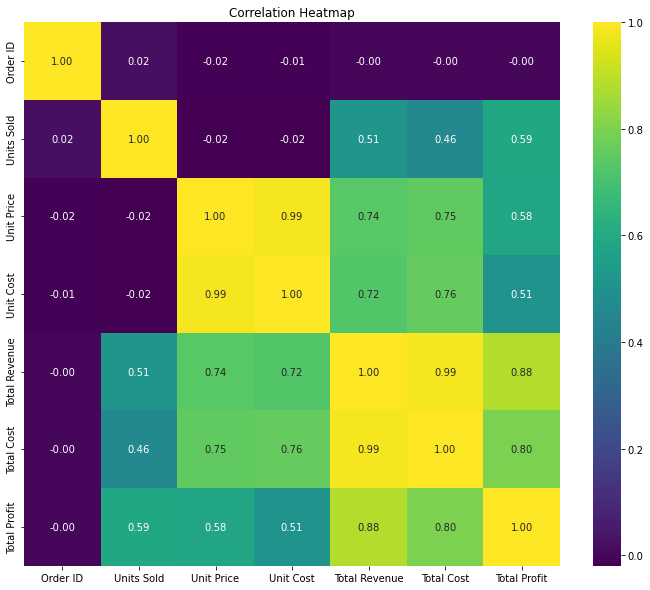

In [13]:
# To visualise the correlation between the various numerical values:

numerical_columns = data.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 10)) 

correlation_matrix = numerical_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")

plt.title('Correlation Heatmap')
plt.show()

<Figure size 720x360 with 0 Axes>

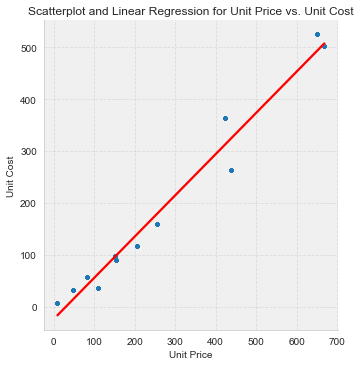

In [14]:
# To visualise the relation between unit price and unit cost based on heatmap:

sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))

scatterplot = sns.lmplot(x="Unit Price", y="Unit Cost", data=data, scatter_kws={"s": 5}, line_kws={'color':'r'})

plt.title("Scatterplot and Linear Regression for Unit Price vs. Unit Cost")

plt.xlabel("Unit Price")
plt.ylabel("Unit Cost")

plt.grid(axis='both', linestyle='--', alpha=0.6)

plt.gca().set_facecolor('#f0f0f0')

plt.show()

<Figure size 720x360 with 0 Axes>

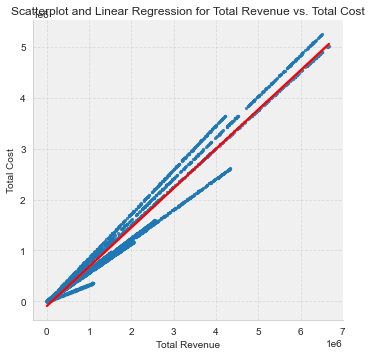

In [15]:
# To visualise the relation between total revenue and total cost based on heatmap:

sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))

scatterplot = sns.lmplot(x="Total Revenue", y="Total Cost", data=data, scatter_kws={"s": 5}, line_kws={'color':'r'})

plt.title("Scatterplot and Linear Regression for Total Revenue vs. Total Cost")

plt.xlabel("Total Revenue")
plt.ylabel("Total Cost")

plt.grid(axis='both', linestyle='--', alpha=0.6)

plt.gca().set_facecolor('#f0f0f0')

plt.show()

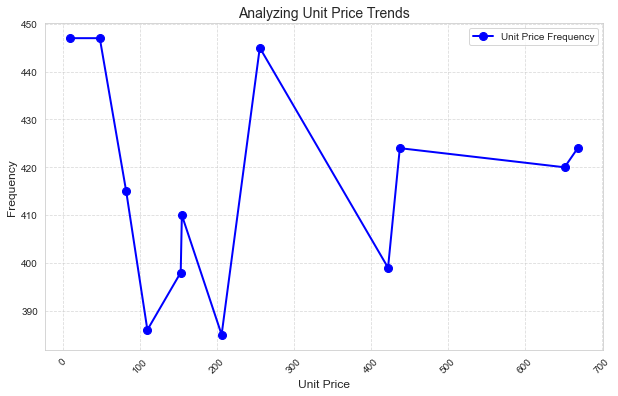

In [17]:
# Analyzing Unit Price Trends:

unit_price_frequency = data['Unit Price'].value_counts().sort_index()
plt.figure(figsize=(10, 6)) 

plt.plot(unit_price_frequency.index, unit_price_frequency.values, marker='o', linestyle='-', color='blue', linewidth=2, markersize=8, label='Unit Price Frequency')

plt.xlabel('Unit Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Analyzing Unit Price Trends', fontsize=14)

plt.legend()

plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(rotation=45)

plt.show()

In [18]:
# Statistcal analysis of Total Revenue:

revenue = data['Total Revenue']

mean = revenue.mean()
median = revenue.median()
mode = revenue.mode()[0]  

range_val = revenue.max() - revenue.min()
variance = revenue.var()
std_dev = revenue.std()
q1 = revenue.quantile(0.25)
q3 = revenue.quantile(0.75)
iqr = q3 - q1

skewness = revenue.skew()
kurtosis = revenue.kurtosis()

print(f"Measures of Central Tendency:")
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}\n")

print(f"Measures of Variability:")
print(f"Range: {range_val}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {std_dev}")
print(f"IQR: {iqr}\n")

print(f"Shape of the Distribution:")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Measures of Central Tendency:
Mean: 1325737.8417080024
Median: 779409.465
Mode: 218.56

Measures of Variability:
Range: 6672610.640000001
Variance: 2176730426792.952
Standard Deviation: 1475374.6733602798
IQR: 1582558.2750000001

Shape of the Distribution:
Skewness: 1.5716458507680229
Kurtosis: 1.8844312985713412


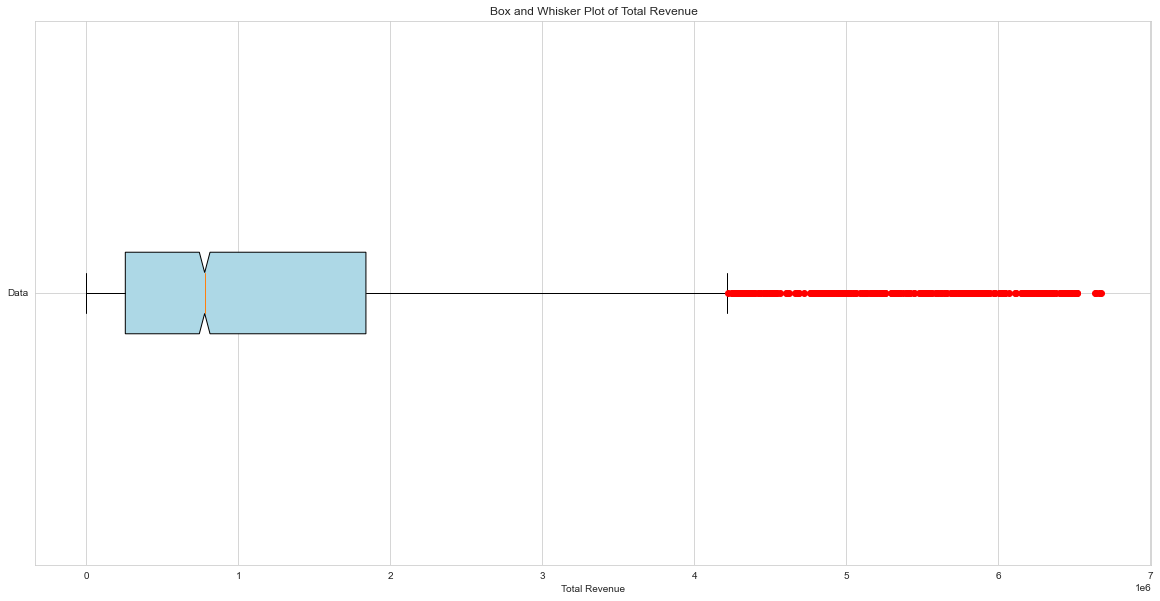

In [19]:
# Box plot analysis of Total Revenue:

fig, ax = plt.subplots(figsize=(20, 10))

boxplot = ax.boxplot(data["Total Revenue"],
                     vert=False, 
                     patch_artist=True,  
                     notch=True, 
                     sym='ro'
                     )

colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)


plt.title('Box and Whisker Plot of Total Revenue')
plt.xlabel('Total Revenue')
ax.yaxis.grid(True)

ax.set_yticklabels(['Data'])

plt.show()

In [20]:
#  Statistical Analysis of Unit Cost:

revenue = data['Unit Cost']

mean = revenue.mean()
median = revenue.median()
mode = revenue.mode()[0]  

range_val = revenue.max() - revenue.min()
variance = revenue.var()
std_dev = revenue.std()
q1 = revenue.quantile(0.25)
q3 = revenue.quantile(0.75)
iqr = q3 - q1

skewness = revenue.skew()
kurtosis = revenue.kurtosis()

print(f"Measures of Central Tendency:")
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}\n")

print(f"Measures of Variability:")
print(f"Range: {range_val}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {std_dev}")
print(f"IQR: {iqr}\n")

print(f"Shape of the Distribution:")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Measures of Central Tendency:
Mean: 187.49414399999978
Median: 97.44
Mode: 6.92

Measures of Variability:
Range: 518.0400000000001
Variance: 31122.703785424586
Standard Deviation: 176.41627981970538
IQR: 227.48999999999998

Shape of the Distribution:
Skewness: 0.8895395676260759
Kurtosis: -0.692870958445508


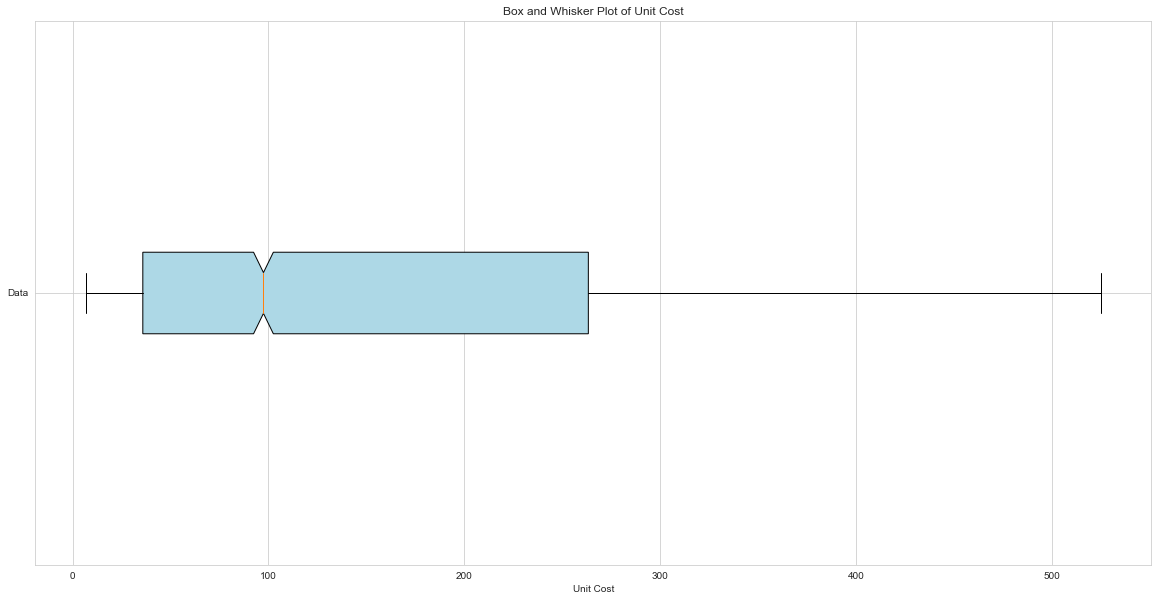

In [21]:
# Box plot of Unit Cost:

fig, ax = plt.subplots(figsize=(20, 10)) 

boxplot = ax.boxplot(data["Unit Cost"],
                     vert=False, 
                     patch_artist=True, 
                     notch=True, 
                     sym='ro'  
                     )

colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Box and Whisker Plot of Unit Cost')
plt.xlabel('Unit Cost')
ax.yaxis.grid(True)

ax.set_yticklabels(['Data'])

plt.show()

In [22]:
# Statistical Analysis of Unit Price:

revenue = data['Unit Price']

mean = revenue.mean()
median = revenue.median()
mode = revenue.mode()[0]  

range_val = revenue.max() - revenue.min()
variance = revenue.var()
std_dev = revenue.std()
q1 = revenue.quantile(0.25)
q3 = revenue.quantile(0.75)
iqr = q3 - q1

skewness = revenue.skew()
kurtosis = revenue.kurtosis()

print(f"Measures of Central Tendency:")
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}\n")

print(f"Measures of Variability:")
print(f"Range: {range_val}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {std_dev}")
print(f"IQR: {iqr}\n")

print(f"Shape of the Distribution:")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Measures of Central Tendency:
Mean: 265.7455639999977
Median: 154.06
Mode: 9.33

Measures of Variability:
Range: 658.9399999999999
Variance: 47836.99285937497
Standard Deviation: 218.71669542898405
IQR: 355.46999999999997

Shape of the Distribution:
Skewness: 0.7245592202022716
Kurtosis: -0.8316795305259941


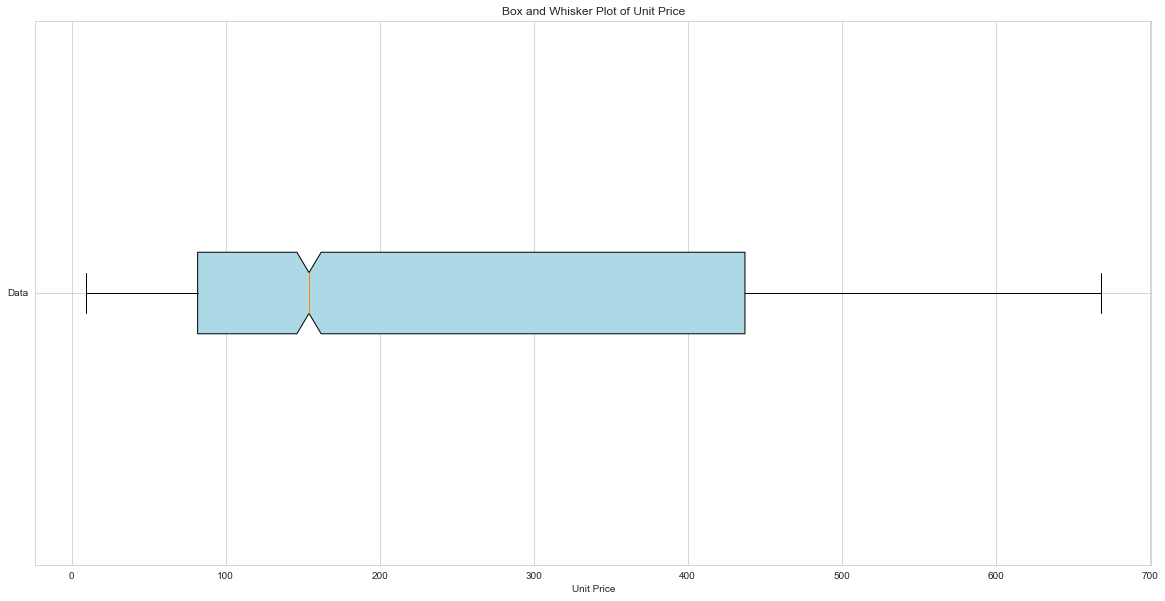

In [23]:
# Box plot of Unit Price:

fig, ax = plt.subplots(figsize=(20, 10)) 

boxplot = ax.boxplot(data["Unit Price"],
                     vert=False, 
                     patch_artist=True, 
                     notch=True, 
                     sym='ro'
                     )

colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Box and Whisker Plot of Unit Price')
plt.xlabel('Unit Price')
ax.yaxis.grid(True)

ax.set_yticklabels(['Data'])

plt.show()

In [26]:
# Statistical Analysis of Unit Sold:

revenue = data['Units Sold']

mean = revenue.mean()
median = revenue.median()
mode = revenue.mode()[0]  

range_val = revenue.max() - revenue.min()
variance = revenue.var()
std_dev = revenue.std()
q1 = revenue.quantile(0.25)
q3 = revenue.quantile(0.75)
iqr = q3 - q1

skewness = revenue.skew()
kurtosis = revenue.kurtosis()

print(f"Measures of Central Tendency:")
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}\n")

print(f"Measures of Variability:")
print(f"Range: {range_val}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {std_dev}")
print(f"IQR: {iqr}\n")

print(f"Shape of the Distribution:")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Measures of Central Tendency:
Mean: 5030.6982
Median: 5123.0
Mode: 2

Measures of Variability:
Range: 9997
Variance: 8494400.172751356
Standard Deviation: 2914.5154267478765
IQR: 5123.25

Shape of the Distribution:
Skewness: -0.025821311275996395
Kurtosis: -1.2247524059361772


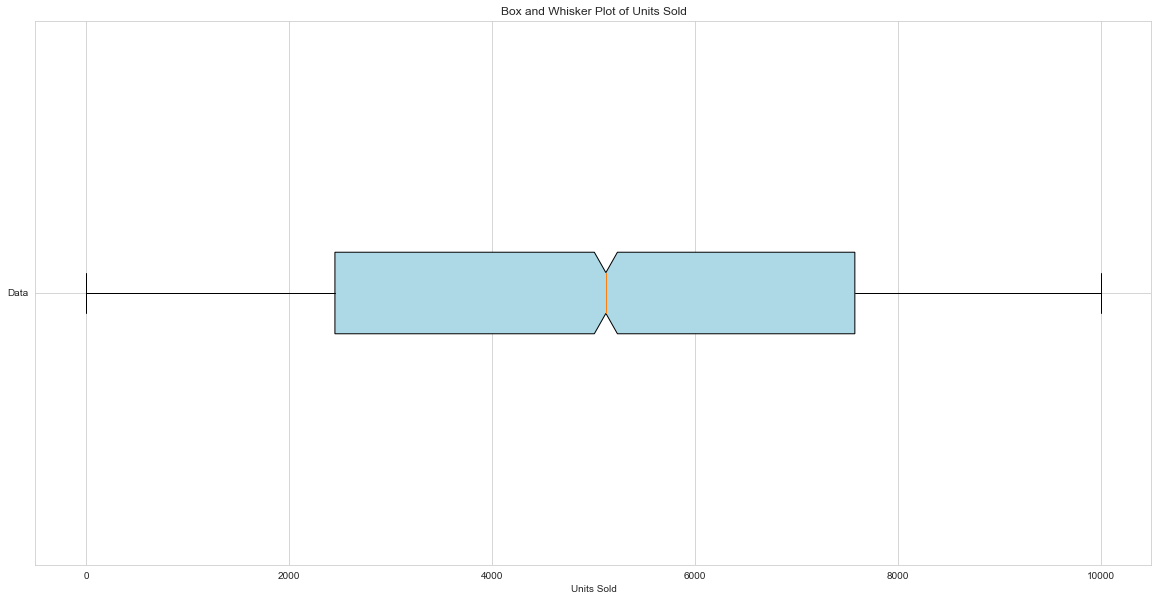

In [25]:
#Box plot Unit Sold:

fig, ax = plt.subplots(figsize=(20, 10)) 

boxplot = ax.boxplot(data["Units Sold"],
                     vert=False,
                     patch_artist=True, 
                     notch=True, 
                     sym='ro' 
                     )

colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Box and Whisker Plot of Units Sold')
plt.xlabel('Units Sold')
ax.yaxis.grid(True)

ax.set_yticklabels(['Data'])

plt.show()

In [24]:
# Statistical Analysis of Total Cost:

revenue = data['Total Cost']

mean = revenue.mean()
median = revenue.median()
mode = revenue.mode()[0]  

range_val = revenue.max() - revenue.min()
variance = revenue.var()
std_dev = revenue.std()
q1 = revenue.quantile(0.25)
q3 = revenue.quantile(0.75)
iqr = q3 - q1

skewness = revenue.skew()
kurtosis = revenue.kurtosis()

print(f"Measures of Central Tendency:")
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}\n")

print(f"Measures of Variability:")
print(f"Range: {range_val}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {std_dev}")
print(f"IQR: {iqr}\n")

print(f"Shape of the Distribution:")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Measures of Central Tendency:
Mean: 933093.1958900003
Median: 468180.67000000004
Mode: 71.68

Measures of Variability:
Range: 5247976.68
Variance: 1324509163002.938
Standard Deviation: 1150873.2176060653
IQR: 1034829.6825

Shape of the Distribution:
Skewness: 1.7590043695551065
Kurtosis: 2.4463577720184597


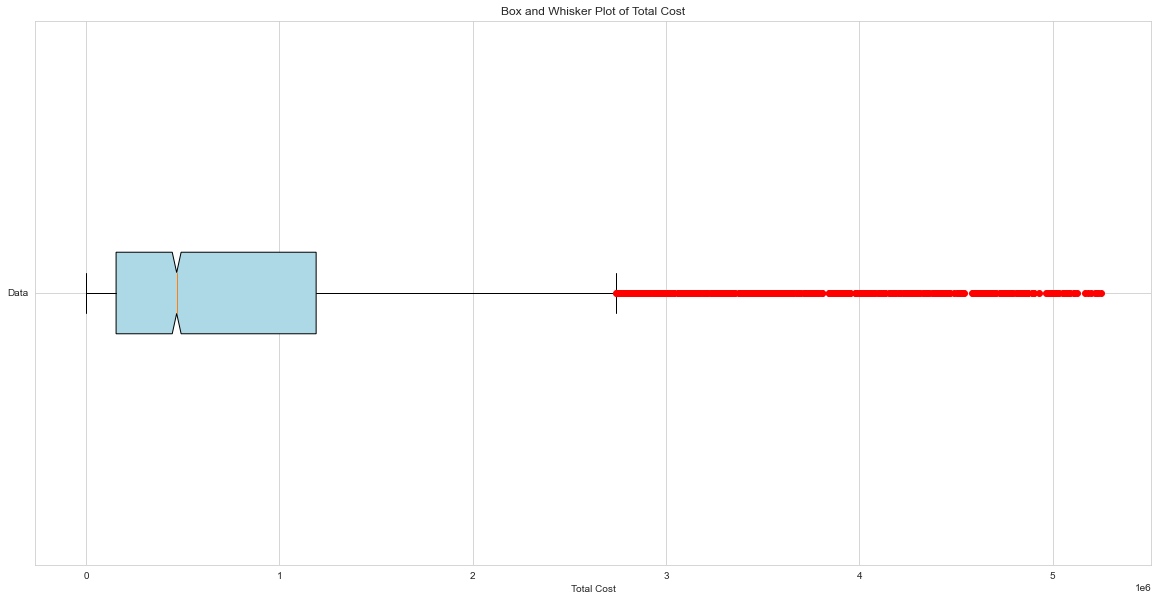

In [27]:
# Box plot of Total Cost:

fig, ax = plt.subplots(figsize=(20, 10)) 

boxplot = ax.boxplot(data["Total Cost"],
                     vert=False, 
                     patch_artist=True, 
                     notch=True, 
                     sym='ro' 
                     )

colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Box and Whisker Plot of Total Cost')
plt.xlabel('Total Cost')
ax.yaxis.grid(True)

ax.set_yticklabels(['Data'])

plt.show()

In [28]:
# Statistical analysis of Total Profit:

revenue = data['Total Profit']

mean = revenue.mean()
median = revenue.median()
mode = revenue.mode()[0]  

range_val = revenue.max() - revenue.min()
variance = revenue.var()
std_dev = revenue.std()
q1 = revenue.quantile(0.25)
q3 = revenue.quantile(0.75)
iqr = q3 - q1

skewness = revenue.skew()
kurtosis = revenue.kurtosis()

print(f"Measures of Central Tendency:")
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}\n")

print(f"Measures of Variability:")
print(f"Range: {range_val}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {std_dev}")
print(f"IQR: {iqr}\n")

print(f"Shape of the Distribution:")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Measures of Central Tendency:
Mean: 392644.64581800025
Median: 279095.175
Mode: 146.88

Measures of Variability:
Range: 1725990.6199999999
Variance: 146639327904.567
Standard Deviation: 382935.14843190747
IQR: 479767.17250000004

Shape of the Distribution:
Skewness: 1.263612349747273
Kurtosis: 1.142738794391298


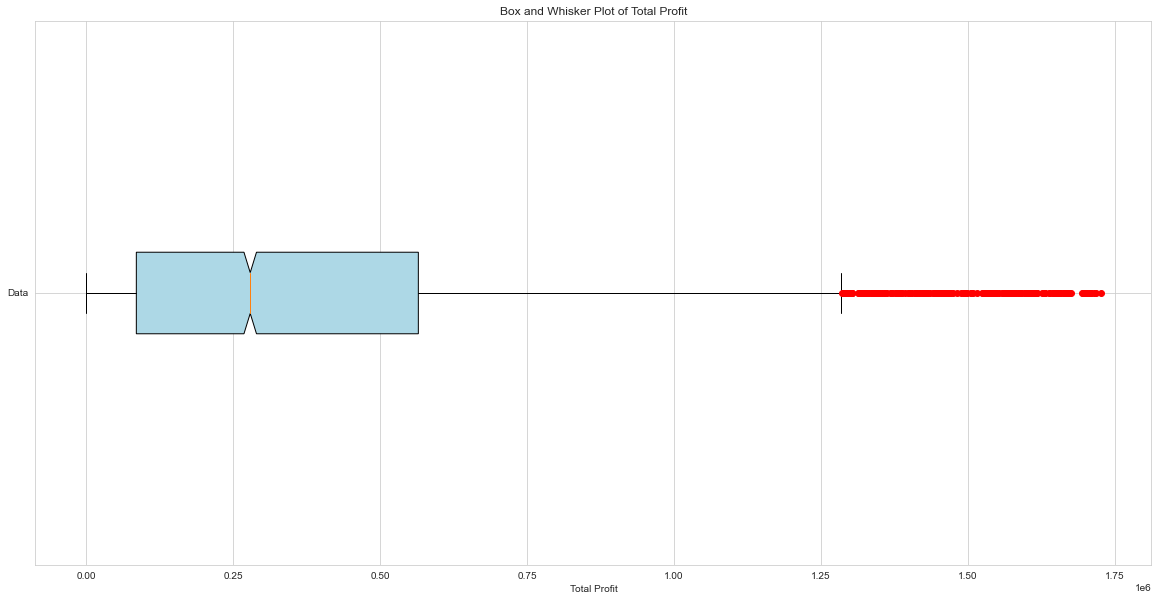

In [29]:
# Box plot of Total Profit:

fig, ax = plt.subplots(figsize=(20, 10))

boxplot = ax.boxplot(data["Total Profit"],
                     vert=False, 
                     patch_artist=True,
                     notch=True, 
                     sym='ro' 
                     )

colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Box and Whisker Plot of Total Profit')
plt.xlabel('Total Profit')
ax.yaxis.grid(True)

ax.set_yticklabels(['Data'])

plt.show()

In [30]:
# Probability of an increase in Total Revenue in the future based on the past data:

increased_revenue_count = len(data[data['Total Revenue'] > data['Total Revenue'].shift(1)])

total_data_points = len(data)

probability_increase = increased_revenue_count / total_data_points

print(f"Historical Probability of Increase in Total Revenue: {probability_increase:.2%}")

Historical Probability of Increase in Total Revenue: 50.54%


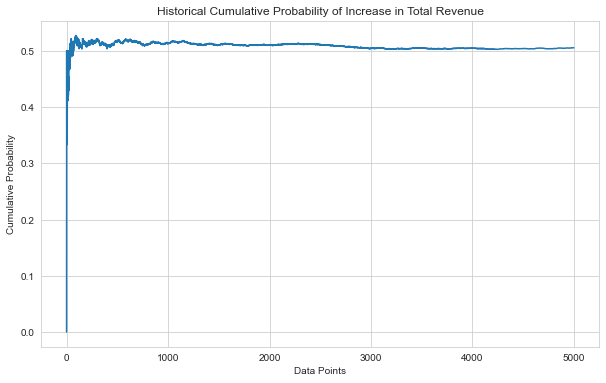

In [31]:
# Graph based visualization of Historical Probability of Increase in Total Revenue:

data['Total Revenue'] = pd.to_numeric(data['Total Revenue'], errors='coerce')
data['Total Revenue'].fillna(0, inplace=True) 
increased_revenue = data['Total Revenue'] > data['Total Revenue'].shift(1)

cumulative_probabilities = increased_revenue.cumsum() / (increased_revenue.index + 1)

plt.figure(figsize=(10, 6))
plt.plot(data.index, cumulative_probabilities, label='Cumulative Probability of Increase in Total Revenue')
plt.xlabel('Data Points')
plt.ylabel('Cumulative Probability')
plt.title('Historical Cumulative Probability of Increase in Total Revenue')
plt.grid(True)

plt.show()

# Scenario 1: Estimating Total Profit in a Sales Region
Objective: Estimating the total profit for a new sales region based on historical data.

Sampling Strategy: Select a random sample of 100 orders from the historical dataset of 5000 orders.

Statistical Inference: Compute the average total profit and its confidence interval for the sample. Based on this sample, make an inference about the probable range of total profit for the new sales region. For example, if the mean total profit in the sample is 400,000 with a 95 percentage confidence interval of ±50,000, you can infer that the total profit in the new region might be around 400,000 with a 95 percentage probability.

# Scenario 2: Evaluating Unit Price Variability for Item Types
Objective: Assess the variability in unit prices for different item types.

Sampling Strategy: Randomly select 3 item types out of the available types and collect unit price data for each type.

Statistical Inference: Calculate the standard deviation of unit prices for each selected item type. By comparing the standard deviations among these item types, infer which item type has the most or least variability in unit prices. For instance, if the standard deviation for item type A is 50 and for item type B is 100, you can infer that item type B has higher variability in unit prices compared to item type A.

# Scenario 3: Estimating Units Sold for Future Orders
Objective: Predict the number of units that might be sold for future orders.

Sampling Strategy: Divide the dataset based on sales channels and select a sample of 50 orders from each channel.

Statistical Inference: Calculate the mean and standard deviation of units sold for each channel. Based on these sample statistics, infer the probable range of units that might be sold for future orders in each channel. For instance, if the mean units sold in Channel 1 is 4000 with a standard deviation of 500 and in Channel 2 it is 6000 with a standard deviation of 800, you can infer that future orders in Channel 2 might have higher variability and possibly higher units sold compared to Channel 1.

# Scenario 4: Analyzing Sales Channel Performance
Objective: Assess the performance of different sales channels in generating total revenue.

Sampling Strategy: Randomly select a sample of 200 orders from each sales channel.

Statistical Inference: Calculate the mean total revenue for each channel in the sample. Based on these means, infer which sales channel is likely to have a higher total revenue. For instance, if the mean revenue in Channel A is $500,000 and in Channel B is $600,000, you can infer that Channel B might perform better in generating total revenue.